In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyreadr
# Read R data

df_FaultFree = pyreadr.read_r('.\data\Tenesee Failure Data\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r('.\data\Tenesee Failure Data\TEP_Faulty_Training.RData')['faulty_training']
df = pd.concat([df_FaultFree,df_Faulty]) 
df.head()


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [18]:
df.shape

(5250000, 55)

# EDA

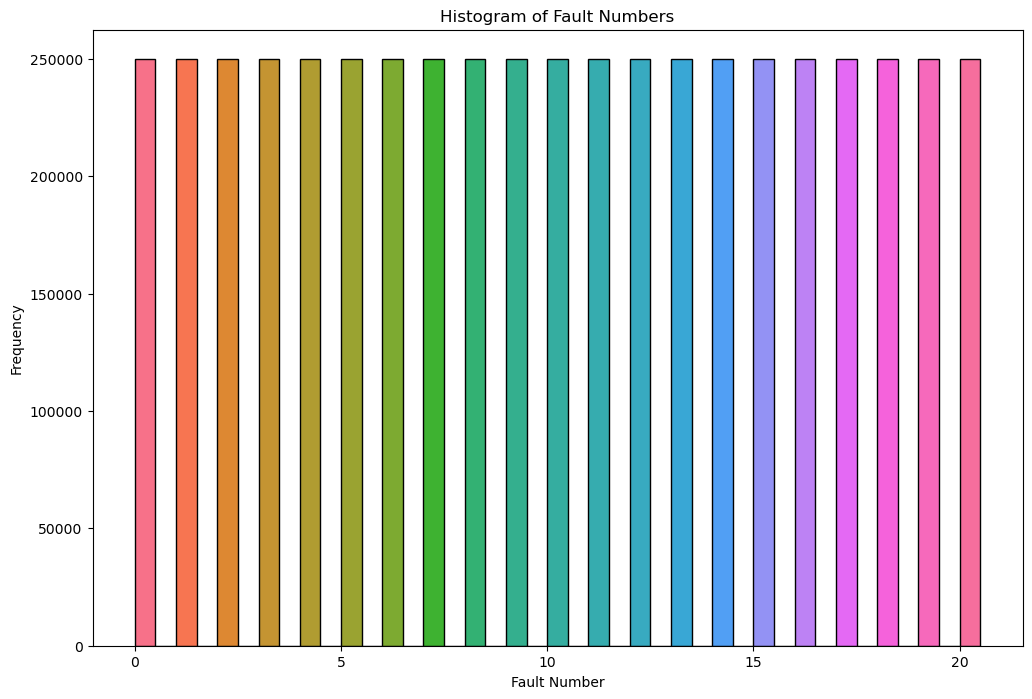

In [23]:


# Asegúrate de que 'faultNumber' es de tipo int
df['faultNumber'] = df['faultNumber'].astype(int)

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crea un histograma para la columna 'faultNumber'
ax = sns.histplot(df['faultNumber'], bins=np.arange(min(df['faultNumber']), max(df['faultNumber']) + 1, 0.5), 
             kde=False, color='blue')  # El color inicial no importa aquí

# Obtén el número de barras
num_bars = len(ax.patches)

# Crea una lista de colores a partir de una paleta de colores
palette = sns.color_palette("husl", num_bars)

# Itera sobre las barras y establece el color de cada una
for bar, color in zip(ax.patches, palette):
    bar.set_facecolor(color)

# Etiqueta los ejes y el título
plt.title('Histogram of Fault Numbers')
plt.xlabel('Fault Number')
plt.ylabel('Frequency')

# Muestra el gráfico
plt.show()




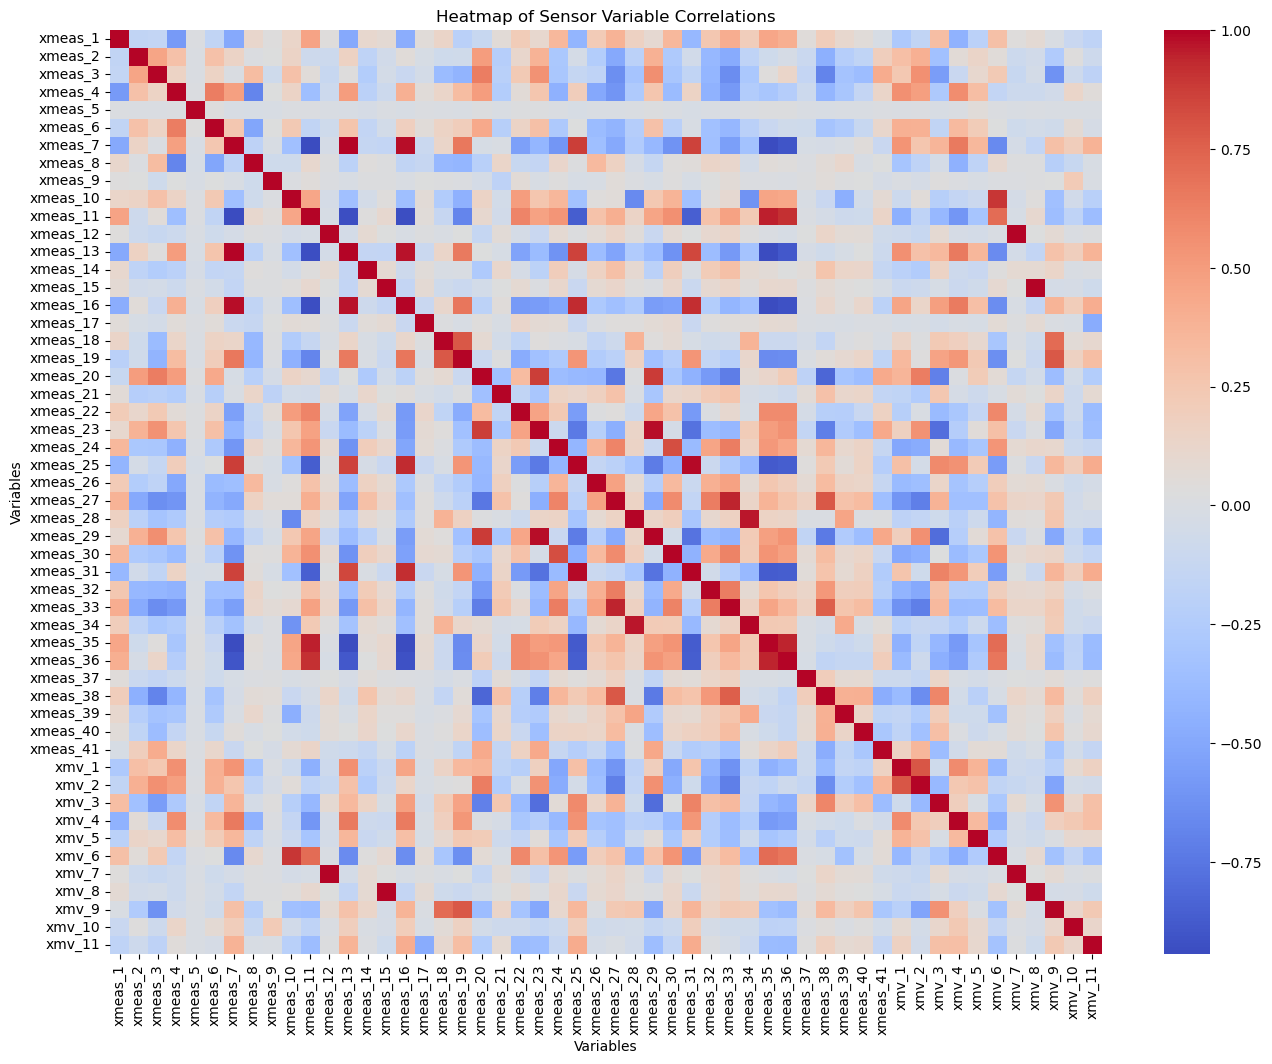

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas que comienzan con 'xmeas' o 'xmv'
columns_of_interest = [col for col in df.columns if col.startswith(('xmeas', 'xmv'))]
data_subset = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = data_subset.corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crea el heatmap
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm')

# Etiqueta los ejes
plt.title('Heatmap of Sensor Variable Correlations')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Muestra el gráfico
plt.show()
